In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [ ]:
import plotly.express as px
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [ ]:
df=pd.read_csv('medical-charges.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Data Visualization

In [ ]:
#sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title='Distribution of Age',height=700)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   height=700,
                   title='Annual Medical Charges(sex)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['blue', 'red','violet','skyblue'],
                   height=700,
                   title='Annual Medical Charges(sex)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.violin(df,x='charges' ,
                   y='sex',
                   color_discrete_sequence=['blue', 'red','violet','skyblue'],
                   height=700,
                   title='Annual Medical Charges(sex)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
smoke_val={'yes':1,'no':0}
smoker_num=df.smoker.map(smoke_val)
smoker_num

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


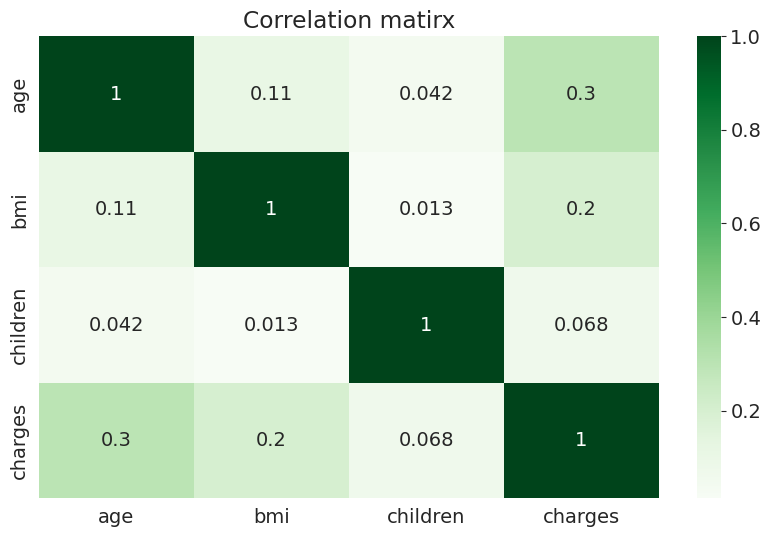

In [ ]:
sns.heatmap(correlation_matrix,cmap='Greens',annot=True)
plt.title('Correlation matirx');

In [ ]:
non_smoker=df[df['smoker']=='no']
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

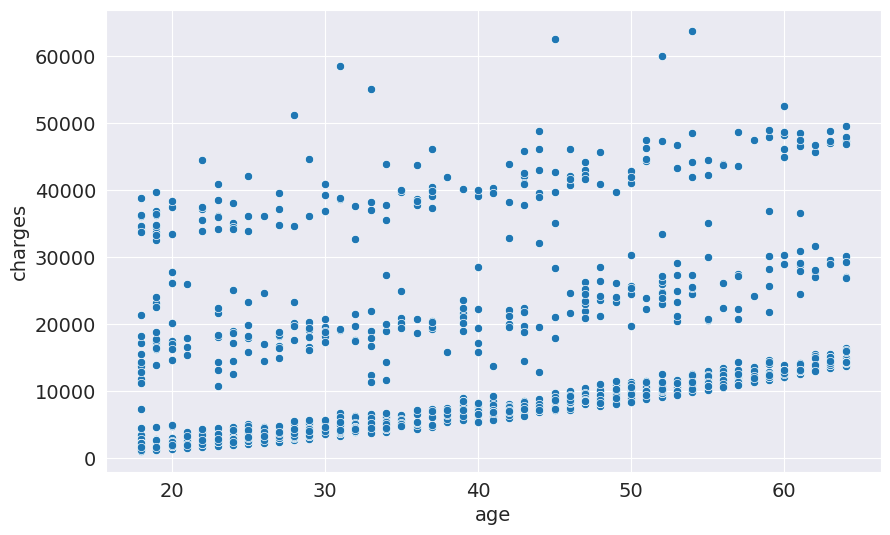

In [ ]:
sns.scatterplot(df,x='age',y='charges')

# Loss calculation

In [ ]:
def rmse(x,y):
        return np.sqrt(np.mean(np.square(x-y)))

4786.123813245354


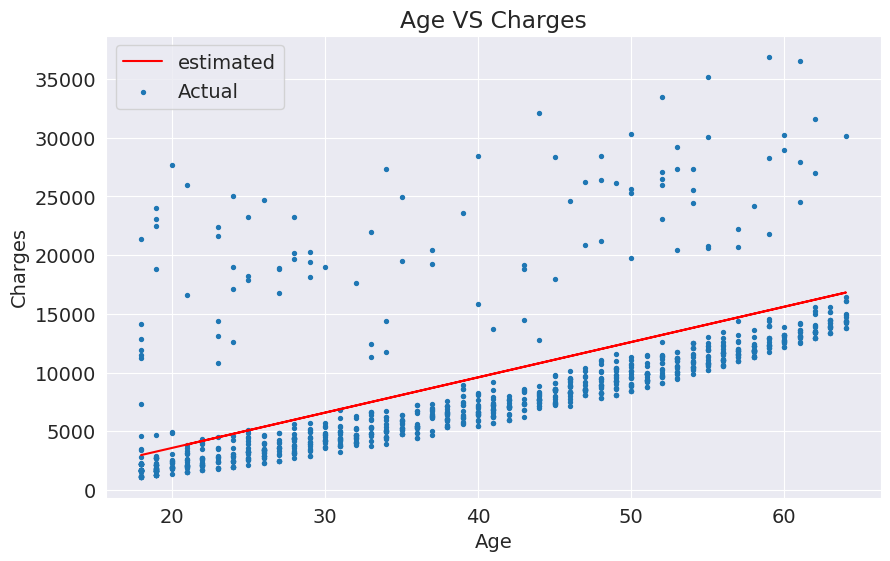

In [ ]:
def estimate(w,age,b):
    return w*age+b
def try_para(w,b):
    def rmse1(x,y):
        return np.sqrt(np.mean(np.square(x-y)))
    target=non_smoker.charges
    ages=non_smoker.age
    estimated=estimate(w,ages,b)
    print(rmse(estimated,target))
    target=non_smoker.charges
    ages=non_smoker.age
    estimated=estimate(w,ages,b)

    plt.plot(ages,estimated,'r')
    plt.scatter(ages,target,s=8)
    plt.title('Age VS Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['estimated','Actual'])
    plt.show()
try_para(301,-2450)

# Machine Learning Model
## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs=non_smoker[['age']]
target=non_smoker.charges
inputs.shape
target.shape

(1064,)

In [ ]:
model.fit(inputs,target)

LinearRegression()

In [ ]:
pred=model.predict(inputs)
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(pred,target)

4662.505766636395

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

4662.505766636395


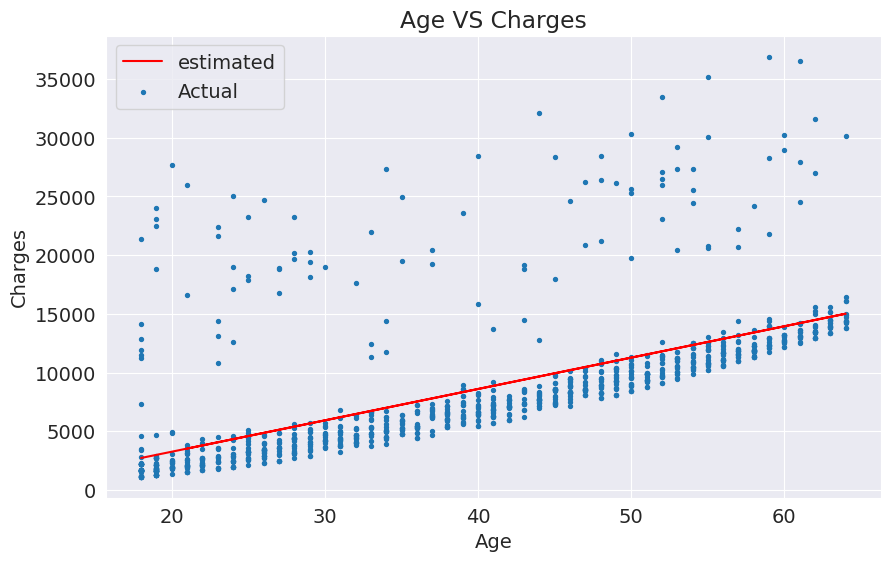

In [ ]:
try_para(model.coef_,model.intercept_)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model=SGDRegressor()

In [ ]:
model.fit(inputs,target)

SGDRegressor()

In [ ]:
pred=model.predict(inputs)
pred

array([ 4623.29966705,  9743.7118165 , 12303.91789123, ...,
        4623.29966705,  4623.29966705,  6159.42331188])

9196.813554836343


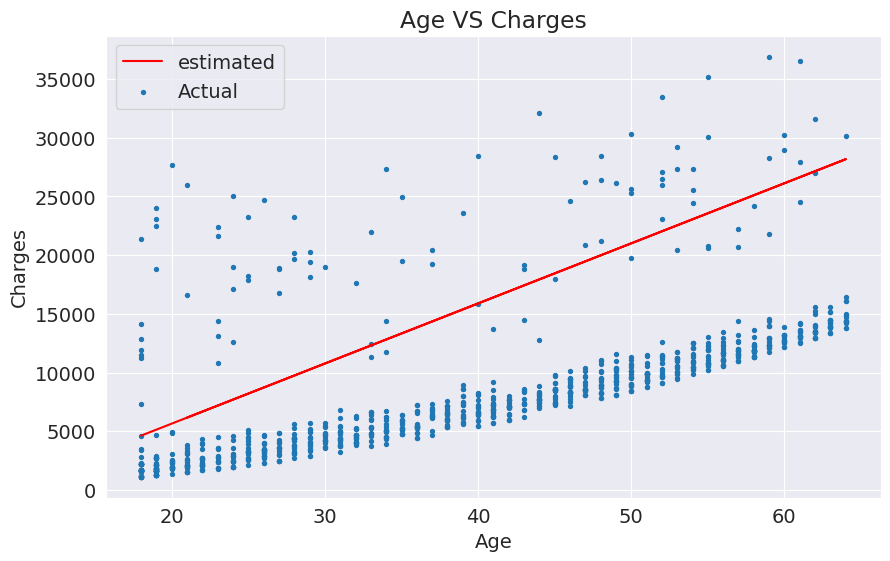

In [ ]:
try_para(model.coef_,model.intercept_)

## for smoker category

In [ ]:
smoker=df[df["smoker"]=="yes"]
smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
def estimate(w,age,b):
    return w*age+b
def try_para(w,b):
    def rmse1(x,y):
        return np.sqrt(np.mean(np.square(x-y)))
    target=smoker.charges
    ages=smoker.age
    estimated=estimate(w,ages,b)
    print(rmse(estimated,target))
    target=smoker.charges
    ages=smoker.age
    estimated=estimate(w,ages,b)

    plt.plot(ages,estimated,'r')
    plt.scatter(ages,target,s=8)
    plt.title('Age VS Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['estimated','Actual'])
    plt.show()

25277.478956298688


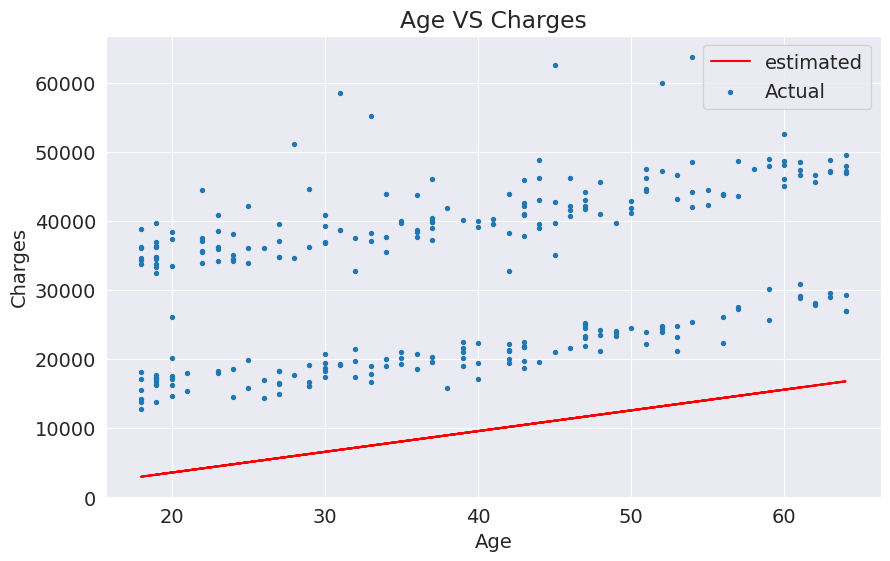

In [ ]:
try_para(300,-2400)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
inputs=smoker[['age']]
target=smoker.charges

In [ ]:
model.fit(inputs,target)

LinearRegression()

In [ ]:
pred=model.predict(inputs)

10711.00334810241


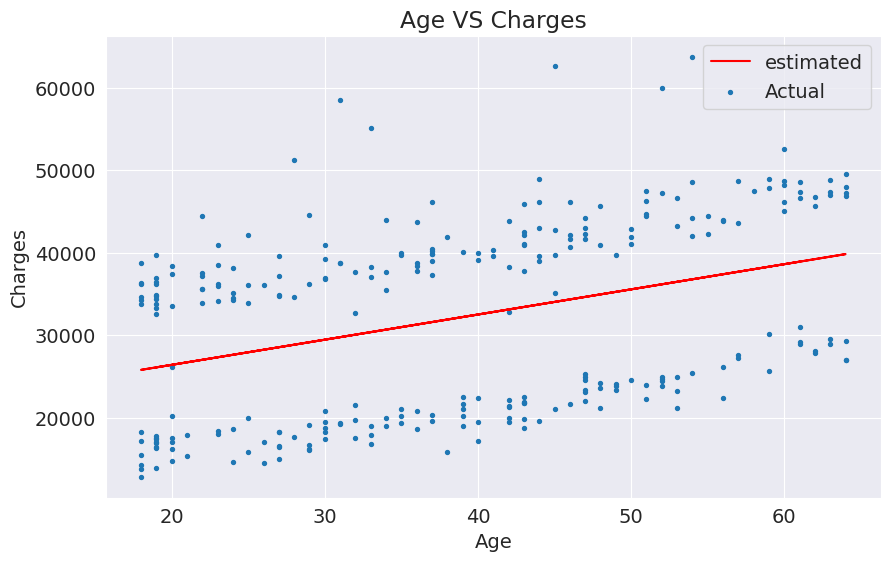

In [ ]:
try_para(model.coef_,model.intercept_)

In [ ]:
inputs,targets=df[['age','children','bmi']],df['charges']
model=LinearRegression().fit(inputs,targets)
p=model.predict(inputs)
loss=rmse(targets,p)
loss

11355.317901125973

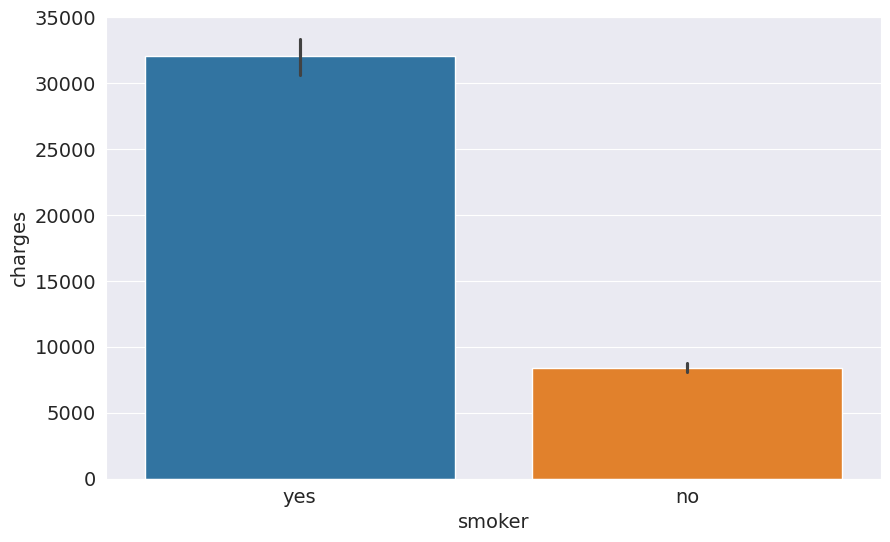

In [ ]:
sns.barplot(data=df,x='smoker',y='charges',hue='smoker');

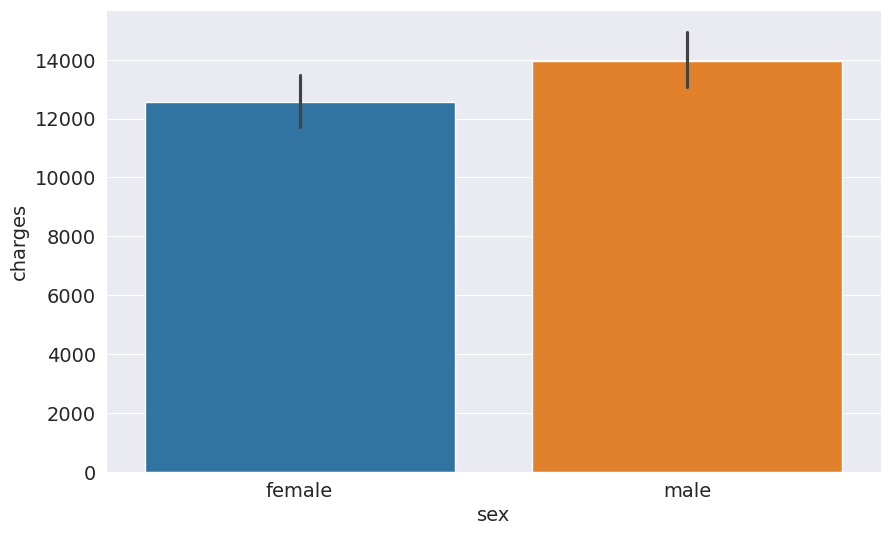

In [ ]:
sns.barplot(data=df,x='sex',y='charges',hue='sex');

In [ ]:
smoker_codes={'no':0,'yes':1}
df['smoker_code']=df.smoker.map(smoker_codes)
sex_codes={'male':1,'female':0}
df['sex_code']=df.sex.map(sex_codes)
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
inputs,targets=df[['age','children','bmi','smoker_code']],df['charges']
model=LinearRegression().fit(inputs,targets)
p=model.predict(inputs)
loss=rmse(targets,p)
loss

6056.439217188081

In [ ]:
df.charges.corr(df.smoker_code)

0.787251430498478

<Axes: xlabel='region', ylabel='charges'>

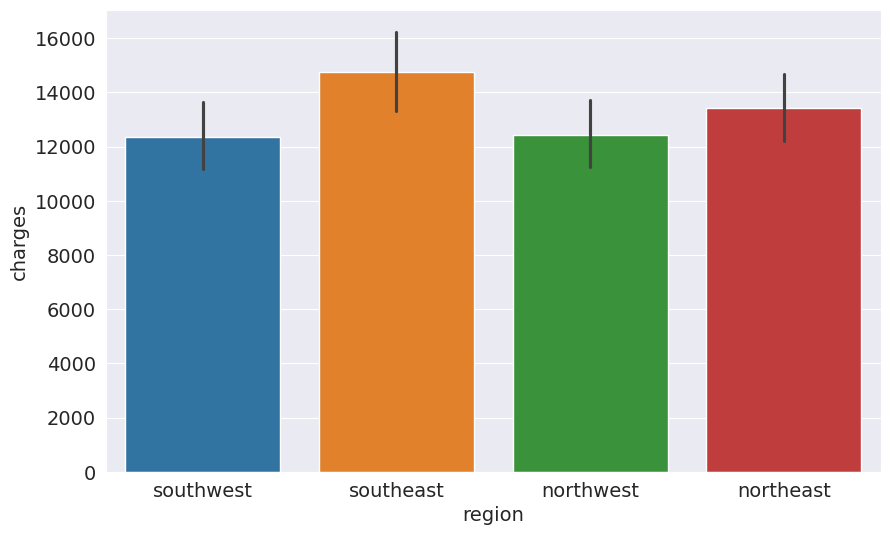

In [ ]:
sns.barplot(df,x='region',y='charges',hue='region')

In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
onehot=enc.transform(df[['region']]).toarray()
onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[['northeast', 'northwest', 'southeast', 'southwest']]=onehot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
input_cols=['age','children','bmi','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs,targets=df[input_cols],df['charges']
model=LinearRegression().fit(inputs,targets)
p=model.predict(inputs)
loss=rmse(targets,p)
loss

6041.6796511744515

In [ ]:
weight_df=pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,children,475.500545
2,bmi,339.193454
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [ ]:
num_cols=['age','bmi','children']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[num_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs=scaler.transform(df[num_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data=df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [ ]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=df.charges
model=LinearRegression().fit(inputs,targets)
predicted=model.predict(inputs)
loss=rmse(predicted,targets)
print(loss)

6041.6796511744515


In [ ]:
weight_df=pd.DataFrame({
    'features':np.append(num_cols+cat_cols,1),
    'weights':np.append(model.coef_,model.intercept_)
})
weight_df.sort_values('weights',ascending=False)

,features,weights
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


features with the largest weight are important

In [ ]:
#['age','children','bmi','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
new_cust=[28,1,33,0,1,0,1,0,0]
scaler.transform([[28,1,33]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -4.86611652, 26.47632003]])

In [ ]:
model.predict([[-0.79795355, -4.86611652, 26.47632003,0,1,0,1,0,0]])

array([10799.87246519])

## Create a test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train,inputs_test,targets_train,targets_test=train_test_split(inputs,targets,test_size=0.1)

In [ ]:
#test set
model=LinearRegression().fit(inputs_train,targets_train)
prediction_test=model.predict(inputs_test)
loss=rmse(targets_test,prediction_test)
print('Test Loss:',loss)

Test Loss: 5916.650918006084


In [ ]:
#train
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train, predictions_train)
print('Train Loss:', loss)

Train Loss: 6057.601298565897


test loss always greater than train loss